<a href="https://colab.research.google.com/github/Bashaer-alwadie-khaldaa-alawaji/Image-Segmentation-Techniques-in-Remote-Sensing/blob/master/apply_and_evaluate_image_segmentation_methods_in_remote_sensing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Apply and Evaluate Image Segmentation methods in remote sensing**

**Read and Check Data Content**

In [0]:
# Helps us to use files saved on Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
image_path = '/content/drive/My Drive/Image Segmentation Techniques in remote sensing/files/sample image/image chips/1d4fbe33f3_F1BE1D4184INSPIRE-000000.png'
im_true_path = '/content/drive/My Drive/Image Segmentation Techniques in remote sensing/files/sample image/label chips/1d4fbe33f3_F1BE1D4184INSPIRE-000000.png'

In [0]:
image = cv2.imread(image_path) # read the image using opencv
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert the image from BGR to RGB
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert the image from BGR to GRAY

ground_truth = cv2.imread(im_true_path) # read the ground truth segmentation
im_true = ground_truth[:,:,0]


(300, 300, 3)


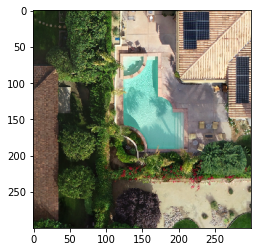

In [0]:
# show the RGB image
print(image.shape)
plt.imshow(image_rgb)


Text(0.5, 1.0, 'Ground Truth Segmentation')

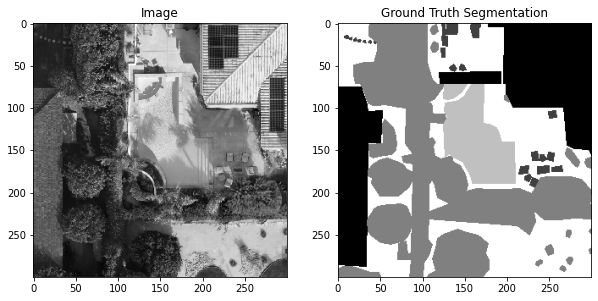

In [0]:
# show the GRAY Image and its Ground Truth Segmentation
fig, axes = plt.subplots(1, 2, figsize=(10, 20))
ax = axes.ravel()

ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title('Image')

ax[1].imshow(im_true, cmap='gray')
ax[1].set_title('Ground Truth Segmentation')

In [0]:
# show the pixels values present in ground truth segmentation and gray image
print("Classes in ground truth segmentation image: \n", np.unique(im_true), "\n")
print("Ground truth segmentation image: \n", im_true, "\n")
print("Gray Image matrix: \n", image_gray, "\n")

Classes in ground truth segmentation image: 
 [0 1 2 3 4] 

Ground truth segmentation image: 
 [[4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 [4 4 4 ... 0 0 0]
 ...
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]
 [2 2 2 ... 4 4 4]] 

Gray Image matrix: 
 [[131  75  94 ... 184 240 239]
 [144  74  81 ... 201 241 237]
 [128  79  86 ... 207 241 240]
 ...
 [ 30  37  68 ...  65  63  67]
 [ 48  43  71 ...  69  64  77]
 [ 52  56  68 ...  65  63  61]] 



In [0]:
# Classes of DroneDeploy Segmentation Dataset

# Class 0 : BUILDING
# Class 1 : CLUTTER
# Class 2 : VEGETATION
# Class 3 : WATER
# Class 4 : GROUND

# Classes below are not present in our image
# Class 5 : CAR
# Class 6 : IGNORE

class_names = ['BUILDING', 'CLUTTER', 'VEGETATION', 'WATER', 'GROUND', 'CAR', 'IGNORE']

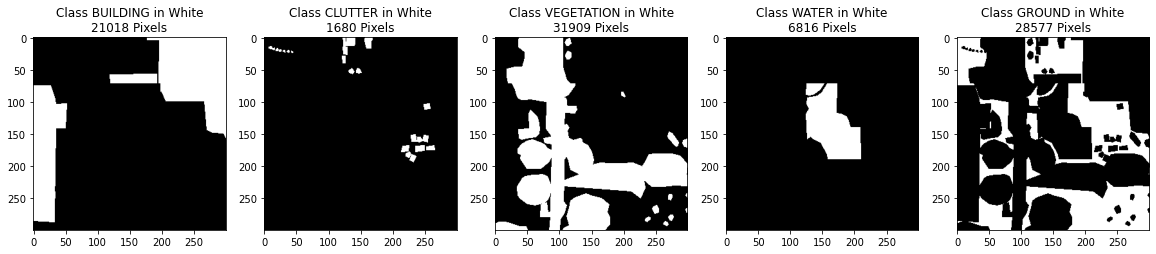

In [0]:
# show classes presence using ground truth segmentation
fig, axes = plt.subplots(1, len(np.unique(im_true)), figsize=(20, 20))
ax = axes.ravel()

for i, seg in zip(range(len(np.unique(im_true))), np.unique(im_true)): 
    ax[i].imshow((im_true==seg)*200, cmap='gray')
    ax[i].set_title("Class " + class_names[i] + " in White\n" + str(np.count_nonzero((im_true==seg))) + " Pixels")

**Threshold**

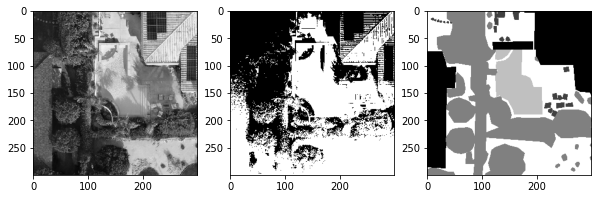

In [0]:
# Global Thresholding using the mean value * 2
# We take in consideration VEGETATION + GROUD classes (most of pixels are in these two classes)
gray_r = image_gray.copy()
gray_r = gray_r.reshape(image_gray.shape[0]*image_gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean()*2:
        gray_r[i] = 4 #GROUND
    else:
        gray_r[i] = 2 #VEGETATION
        
gray_bw = gray_r.reshape(image_gray.shape[0],image_gray.shape[1])

fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_gray, cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(gray_bw, cmap='gray')
ax = fig1.add_subplot(1, 3, 3)  # create an axes object in the figure
ax.imshow(im_true, cmap='gray')

In [0]:
threshold_golbal_result = gray_bw.copy()

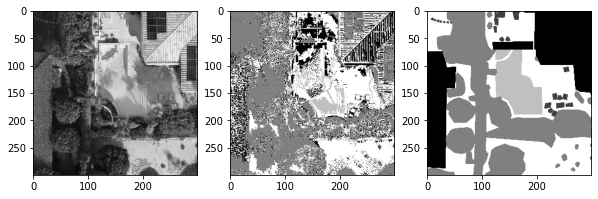

In [0]:
# Local Thresholding using the multiple values
gray_r = image_gray.copy()

gray_r = gray_r.reshape(image_gray.shape[0]*image_gray.shape[1])

for i in range(gray_r.shape[0]):
    if gray_r[i] >  210:
        gray_r[i] = 0 #BUILDING 
    elif gray_r[i] > 170:
        gray_r[i] = 4 #GROUND
    elif gray_r[i] > 140:  
        gray_r[i] = 3 # WATER
    elif gray_r[i] > 100:
        gray_r[i] = 4 # GROUND (instead of "1 # CLUTTER" because it's confused with GROUND)
    elif gray_r[i] > 85:
        gray_r[i] = 0 #BUILDING
    elif gray_r[i] > 20:
        gray_r[i] = 2 #VEGETATION
    else:
        gray_r[i] = 4 #GROUND

gray_resut = gray_r.reshape(image_gray.shape[0],image_gray.shape[1])

fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_gray, cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(gray_resut, cmap='gray')
ax = fig1.add_subplot(1, 3, 3)  # create an axes object in the figure
ax.imshow(im_true, cmap='gray')

# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4, CAR:5, IGNORE:6

In [0]:
threshold_local_result = gray_resut.copy()

In [0]:
# Evaluate Threshold Results
from skimage.metrics import adapted_rand_error
from sklearn.metrics import accuracy_score

im_true_r = im_true.copy().reshape(im_true.shape[0]*im_true.shape[1])
threshold_golbal_result_r = threshold_golbal_result.copy().reshape(
    threshold_golbal_result.shape[0]*threshold_golbal_result.shape[1])
threshold_local_result_r = threshold_local_result.copy().reshape(
    threshold_local_result.shape[0]*threshold_local_result.shape[1])

error, precision, recall = adapted_rand_error(im_true, threshold_golbal_result)
accuracy = accuracy_score(im_true_r, threshold_golbal_result_r)

print("Global thresholding:")
print("Error: " , error*100)
print("precision: " , precision*100)
print("recall: " , recall*100)
print("Accuracy: " , accuracy*100)

error, precision, recall = adapted_rand_error(im_true, threshold_local_result)
accuracy = accuracy_score(im_true_r, threshold_local_result_r)

print("\nLocal thresholding:")
print("Error: " , error*100)
print("precision: " , precision*100)
print("recall: " , recall*100)
print("Accuracy: " , accuracy*100)

Global thresholding:
Error:  53.686853267124576
precision:  52.998860081819764
recall:  41.12526642234944
Accuracy:  40.23111111111111

Local thresholding:
Error:  53.31721591994205
precision:  43.90346115301416
recall:  49.83778106452981
Accuracy:  50.346666666666664


**K-means**

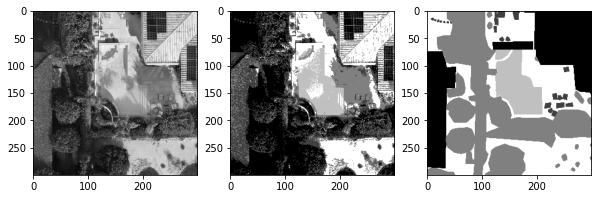

In [0]:
# K-means segmentation
from sklearn.cluster import KMeans

# create a copy of the rgb image
pic = image_rgb.copy()

# convert from integers to floats
pic = pic.astype('float32')

# normalize to the range 0-1
pic /= 255.0

# reshape the image for clustering
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2]) 

# apply K-means algorithm to the image using 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)

# show K-means segmentation resullt
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
cluster_pic_gray = cv2.cvtColor(cluster_pic, cv2.COLOR_RGB2GRAY)

cluster_pic_gray_r = cluster_pic_gray.copy()

class_ids = list(range(len(np.unique(cluster_pic_gray_r))))

for i, c in zip(class_ids, np.unique(cluster_pic_gray_r)):
    cluster_pic_gray_r[(cluster_pic_gray_r == c)] = i

cluster_pic_gray_r = cluster_pic_gray_r.astype(int)

fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_gray, cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(cluster_pic_gray_r, cmap='gray')
ax = fig1.add_subplot(1, 3, 3)  # create an axes object in the figure
ax.imshow(im_true, cmap='gray')

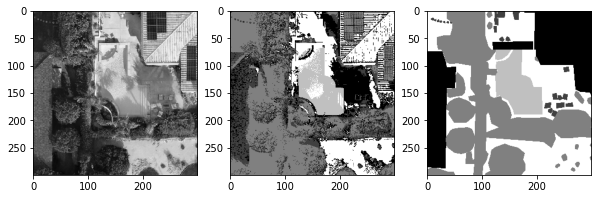

In [0]:
# inverse VEGETATION & BUILDING pixel values
cluster_pic_gray_r[(cluster_pic_gray_r == 0)] = 9 # temp value
cluster_pic_gray_r[(cluster_pic_gray_r == 2)] = 0
cluster_pic_gray_r[(cluster_pic_gray_r == 9)] = 2

fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_gray, cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(cluster_pic_gray_r, cmap='gray')
ax = fig1.add_subplot(1, 3, 3)  # create an axes object in the figure
ax.imshow(im_true, cmap='gray')

In [0]:
k_means_result = cluster_pic_gray_r.copy()

In [0]:
# Evaluate K-means Results
from skimage.metrics import adapted_rand_error
from sklearn.metrics import accuracy_score

im_true_r = im_true.copy().reshape(im_true.shape[0]*im_true.shape[1])
k_means_result_r = k_means_result.copy().reshape(
    k_means_result.shape[0]*k_means_result.shape[1])

error, precision, recall = adapted_rand_error(im_true, k_means_result)
accuracy = accuracy_score(im_true_r, k_means_result_r)

print("K-means:")
print("Error: " , error*100)
print("precision: " , precision*100)
print("recall: " , recall*100)
print("Accuracy: " , accuracy*100)

K-means:
Error:  55.61798696915279
precision:  35.97214814413723
recall:  57.923951102652204
Accuracy:  41.48444444444445


**MeanShift**

Number of estimated clusters : 4


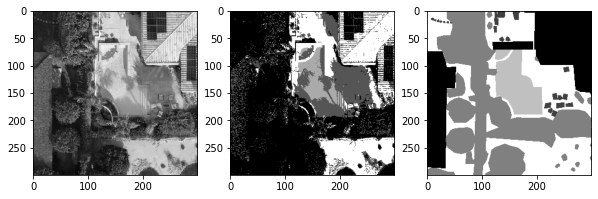

In [0]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(pic_n, quantile=0.2, n_samples=500)

# Clustering using MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(pic_n)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("Number of estimated clusters : %d" % n_clusters_)

# show mean-shift segmentation resullt
pic2show = cluster_centers[labels]
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
cluster_pic_gray = cv2.cvtColor(cluster_pic, cv2.COLOR_RGB2GRAY)

cluster_pic_gray_r = cluster_pic_gray.copy()

class_ids = list(range(len(np.unique(cluster_pic_gray_r))))

for i, c in zip(class_ids, np.unique(cluster_pic_gray_r)):
    cluster_pic_gray_r[(cluster_pic_gray_r == c)] = i

cluster_pic_gray_r = cluster_pic_gray_r.astype(int)

fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_gray, cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(cluster_pic_gray_r, cmap='gray')
ax = fig1.add_subplot(1, 3, 3)  # create an axes object in the figure
ax.imshow(im_true, cmap='gray')

In [0]:
print(np.unique(cluster_pic_gray_r))

[0 1 2 3]


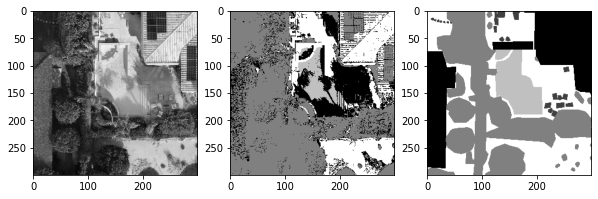

In [0]:
# 0 -> 2 VEGETATION
# 1 -> 0 BUILDING
# 2 -> 3 WATER
# 3 -> 4 GROUND

# inverse pixel values after observing the results
cluster_pic_gray_r[(cluster_pic_gray_r == 3)] = 4
cluster_pic_gray_r[(cluster_pic_gray_r == 2)] = 3
cluster_pic_gray_r[(cluster_pic_gray_r == 0)] = 2
cluster_pic_gray_r[(cluster_pic_gray_r == 1)] = 0

fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_gray, cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(cluster_pic_gray_r, cmap='gray')
ax = fig1.add_subplot(1, 3, 3)  # create an axes object in the figure
ax.imshow(im_true, cmap='gray')

In [0]:
ms_result = cluster_pic_gray_r.copy()

In [0]:
# Evaluate MeanShift Results
im_true_r = im_true.copy().reshape(im_true.shape[0]*im_true.shape[1])
ms_result_r = ms_result.copy().reshape(
    ms_result.shape[0]*ms_result.shape[1])

error, precision, recall = adapted_rand_error(im_true, ms_result)
accuracy = accuracy_score(im_true_r, ms_result_r)

print("MeanShift:")
print("Error: " , error*100)
print("precision: " , precision*100)
print("recall: " , recall*100)
print("Accuracy: " , accuracy*100)

MeanShift:
Error:  44.66977895858177
precision:  54.47617387822543
recall:  56.21147326347911
Accuracy:  49.49111111111112


**SLIC** **method** 

In [0]:
!git clone https://github.com/laixintao/slic-python-implementation

Cloning into 'slic-python-implementation'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 43 (delta 2), reused 1 (delta 0), pack-reused 34
Unpacking objects: 100% (43/43), done.


In [0]:
import os
import sys

In [0]:
# Root directory of the project
ROOT_DIR_3 = os.path.abspath("/content/slic-python-implementation")

# To find local version of the library
sys.path.append(ROOT_DIR_3) 

In [0]:
import slic

In [0]:
p = slic.SLICProcessor(image_path, 15, 30)

p.init_clusters()
p.move_clusters()

p.assignment()
p.update_cluster()

name = 'Result_M{m}_K{k}.png'.format(m=p.M, k=p.K)
p.save_current_image(name)

[  0  17  29  30  32  38  72  74  76  90 112 153 186 205 206 215 230]


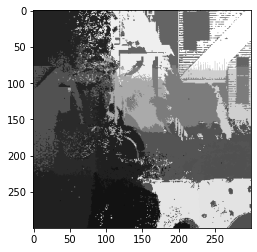

In [0]:
slic_res = cv2.imread(name, 0)
print(np.unique(slic_res))
plt.imshow(slic_res, cmap='gray')

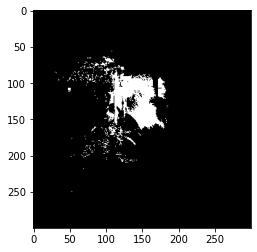

In [0]:
plt.imshow((slic_res == 153)*200, cmap='gray')

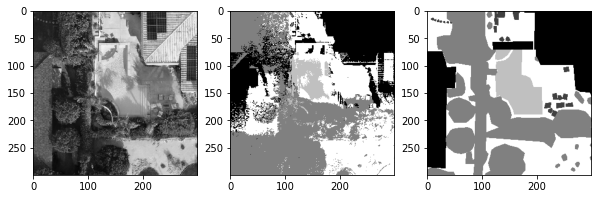

In [0]:
#[  0  17  29  30  32  38  72  74  76  90 112 153 186 205 206 215 230]
# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4, CAR:5, IGNORE:6

new_slic_res = np.zeros(slic_res.shape)
idx = slic_res==17 
new_slic_res[idx] = 2 # VEGETATION
idx = slic_res==29 
new_slic_res[idx] = 2
idx = slic_res==30
new_slic_res[idx] = 2
idx = slic_res==32
new_slic_res[idx] = 2
idx = slic_res==76
new_slic_res[idx] = 2

idx = slic_res==153
new_slic_res[idx] = 3 # WATER

idx = slic_res==38
new_slic_res[idx] = 4 # GROUND
idx = slic_res==72
new_slic_res[idx] = 4
idx = slic_res==112
new_slic_res[idx] = 4
idx = slic_res==205
new_slic_res[idx] = 4
idx = slic_res==206
new_slic_res[idx] = 4
idx = slic_res==215
new_slic_res[idx] = 4

idx = slic_res==74
new_slic_res[idx] = 0 # BUILDING
idx = slic_res==90
new_slic_res[idx] = 0
idx = slic_res==186
new_slic_res[idx] = 0
idx = slic_res==230
new_slic_res[idx] = 0

new_slic_res = new_slic_res.astype(int)

fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.imshow(image_gray, cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.imshow(new_slic_res, cmap='gray')
ax = fig1.add_subplot(1, 3, 3)  # create an axes object in the figure
ax.imshow(im_true, cmap='gray')

In [0]:
slic_result = new_slic_res.copy()

In [0]:
# Evaluate SLIC Results
im_true_r = im_true.copy().reshape(im_true.shape[0]*im_true.shape[1])
slic_result_r = slic_result.copy().reshape(
    slic_result.shape[0]*slic_result.shape[1])

error, precision, recall = adapted_rand_error(im_true, slic_result)
accuracy = accuracy_score(im_true_r, slic_result_r)

print("SLIC:")
print("Error: " , error*100)
print("precision: " , precision*100)
print("recall: " , recall*100)
print("Accuracy: " , accuracy*100)

SLIC:
Error:  53.217061257028234
precision:  44.94377913802833
recall:  48.77904245688058
Accuracy:  60.80444444444445


**Felzenszwalb**method

In [0]:
from skimage.segmentation import felzenszwalb
from skimage.segmentation import mark_boundaries

img = image_rgb.copy()

segments_fz = felzenszwalb(img, scale=500, sigma=0.9, min_size=250)

print(f"Felzenszwalb number of segments: {len(np.unique(segments_fz))}")

Felzenszwalb number of segments: 36


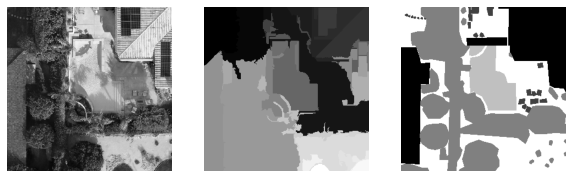

In [0]:
fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.set_axis_off()
ax.imshow(image_gray, cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.set_axis_off()
ax.imshow(segments_fz, cmap='gray')
ax = fig1.add_subplot(1, 3, 3)  # create an axes object in the figure
ax.set_axis_off()
ax.imshow(im_true, cmap='gray')

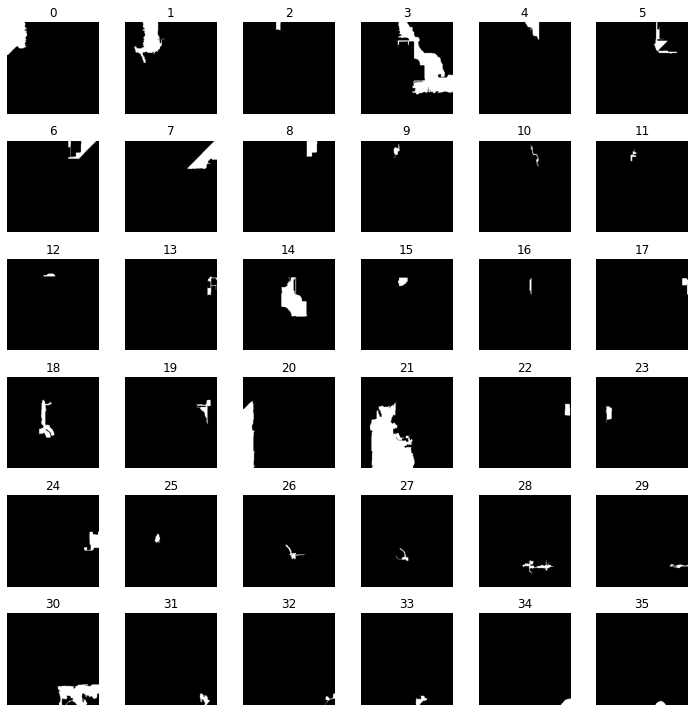

In [0]:
fig, ax = plt.subplots(6, 6, figsize=(10, 10), sharex=True, sharey=True)

c = 0
for i in range(6):
    for j in range(6):
        ax[i, j].imshow((segments_fz == c)*200, cmap='gray')
        ax[i, j].set_title(str(c))
        c += 1

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

In [0]:
# BUILDING:0, CLUTTER:1 , VEGETATION:2, WATER:3, GROUND:4, CAR:5, IGNORE:6
fz_res = np.zeros(segments_fz.shape).astype(int)
idx = segments_fz== 0
fz_res[idx] = 4 #
idx = segments_fz== 1
fz_res[idx] = 2 #
idx = segments_fz== 2
fz_res[idx] = 4 #
idx = segments_fz== 3
fz_res[idx] = 4 #
idx = segments_fz== 4
fz_res[idx] = 4 #
idx = segments_fz== 5
fz_res[idx] = 0 #
idx = segments_fz== 6
fz_res[idx] = 0 #
idx = segments_fz== 7
fz_res[idx] = 0 #
idx = segments_fz== 8
fz_res[idx] = 0 #
idx = segments_fz== 9
fz_res[idx] = 4 #
idx = segments_fz== 10
fz_res[idx] = 4 #
idx = segments_fz== 11
fz_res[idx] = 4 #
idx = segments_fz== 12
fz_res[idx] = 4 #
idx = segments_fz== 13
fz_res[idx] = 0 #
idx = segments_fz== 14
fz_res[idx] = 3 #
idx = segments_fz== 15
fz_res[idx] = 3 #
idx = segments_fz== 16
fz_res[idx] = 3 #
idx = segments_fz== 17
fz_res[idx] = 0 # 
idx = segments_fz== 18
fz_res[idx] = 4 #
idx = segments_fz== 19
fz_res[idx] = 0 #
idx = segments_fz== 20
fz_res[idx] = 0 #
idx = segments_fz== 21
fz_res[idx] = 2 #
idx = segments_fz== 22
fz_res[idx] = 0 #
idx = segments_fz== 23
fz_res[idx] = 0 #
idx = segments_fz== 24
fz_res[idx] = 0 #
idx = segments_fz== 25
fz_res[idx] = 4 #
idx = segments_fz== 26
fz_res[idx] = 4 #
idx = segments_fz== 27
fz_res[idx] = 2 #
idx = segments_fz== 28
fz_res[idx] = 2 #
idx = segments_fz== 29
fz_res[idx] = 2 #
idx = segments_fz== 30
fz_res[idx] = 4 #
idx = segments_fz== 31
fz_res[idx] = 4 #
idx = segments_fz== 32
fz_res[idx] = 4 #
idx = segments_fz== 33
fz_res[idx] = 4 #
idx = segments_fz== 34
fz_res[idx] = 4 #
idx = segments_fz== 35
fz_res[idx] = 4 #

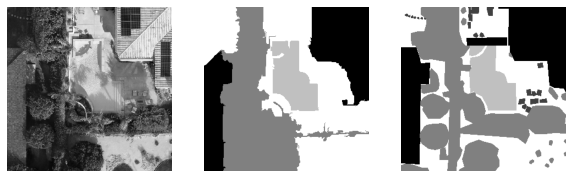

In [0]:
fig1 = plt.figure(figsize=(10,20))  # create a figure object
ax = fig1.add_subplot(1, 3, 1)  # create an axes object in the figure
ax.set_axis_off()
ax.imshow(image_gray, cmap='gray')
ax = fig1.add_subplot(1, 3, 2)  # create an axes object in the figure
ax.set_axis_off()
ax.imshow(fz_res, cmap='gray')
ax = fig1.add_subplot(1, 3, 3)  # create an axes object in the figure
ax.set_axis_off()
ax.imshow(im_true, cmap='gray')

In [0]:
from skimage.metrics import adapted_rand_error

im_true_r = im_true.copy().reshape(im_true.shape[0]*im_true.shape[1])
fz_res_r = fz_res.copy().reshape(fz_res.shape[0]*fz_res.shape[1])

error, precision, recall = adapted_rand_error(im_true, fz_res)
accuracy = accuracy_score(im_true_r, fz_res_r)

print("Felzenszwalb:")
print("Error: " , error*100)
print("precision: " , precision*100)
print("recall: " , recall*100)
print("Accuracy: " , accuracy*100)

Felzenszwalb:
Error:  43.145175807167256
precision:  56.6471145956543
recall:  57.06406262529077
Accuracy:  74.94888888888889
